In [1]:
import numpy as np
import pandas as pd

import glob

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
filenames = glob.glob('../data/*.csv')
print(filenames)

['../data/takehome_users.csv', '../data/takehome_user_engagement.csv']


In [3]:
filelist = [pd.read_csv(f, encoding='Latin') for f in filenames]

df_usr = pd.DataFrame(filelist[0])
df_eng = pd.DataFrame(filelist[1])

# User engagement Info

In [4]:
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [6]:
# convert to datetime
df_eng['time_stamp'] = pd.to_datetime(df_eng['time_stamp'])

In [7]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


# User info

In [8]:
df_usr.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [9]:
df_usr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [10]:
# convert to datetime
df_usr['creation_time'] = pd.to_datetime(df_usr['creation_time'])

In [11]:
df_usr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


# EDA

### - identifying the most engaging users

In [12]:
df_usr['invited_by_user_id'].describe()

count     6417.000000
mean      5962.957145
std       3383.761968
min          3.000000
25%       3058.000000
50%       5954.000000
75%       8817.000000
max      11999.000000
Name: invited_by_user_id, dtype: float64

In [13]:
df_eng['user_id'].describe()

count    207917.000000
mean       5913.314197
std        3394.941674
min           1.000000
25%        3087.000000
50%        5682.000000
75%        8944.000000
max       12000.000000
Name: user_id, dtype: float64

In [14]:
# merging the dataframes on id
merged = pd.merge(df_eng, df_usr, left_on='user_id', right_on='object_id')
merged.head()

,time_stamp,user_id,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [15]:
# sorted number of users invited
invitation = df_usr.groupby('invited_by_user_id')['name'].count()
invitation.sort_values(ascending=False).head(10)

invited_by_user_id
10741.0    13
2527.0     12
2308.0     11
11770.0    11
1525.0     11
10628.0    10
4302.0     10
2354.0     10
6370.0     10
10481.0    10
Name: name, dtype: int64

In [16]:
merged.head()

,time_stamp,user_id,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [17]:
user_info = pd.merge(invitation, merged[['user_id', 'name']], left_index=True, right_on='user_id')
user_info = user_info.drop('user_id', axis=1)
user_info.columns = ['Count','Name']
user_info.head()

,Count,Name
15,1,Bottrill Mitchell
19,5,Sewell Tyler
20,1,Santos Carla
21,1,Santos Carla
22,1,Santos Carla


In [18]:
grouped_users = user_info.groupby('Name')['Count'].max()

In [19]:
# user names in order
grouped_users.sort_values(ascending=False).head(10)

Name
Ribeiro Diego      12
Kay Alice          11
Barbosa Tiago      11
McCoy Donna        10
Kreger Kristin     10
Romero Susan       10
Crampton Miriam    10
Rocha Davi         10
Richardson Lucy    10
Corona Samuel      10
Name: Count, dtype: int64

In [20]:
df_usr[df_usr['object_id'] == 2527]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
2526,2527,2012-06-18 02:45:04,Ribeiro Diego,DiegoRochaRibeiro@gustr.com,PERSONAL_PROJECTS,1.340420e+09,0,0,57,NaN


### - organization engagement

In [21]:
df_usr.org_id.value_counts().head(10)

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
Name: org_id, dtype: int64

### - time series user information

In [22]:
import datetime as dt

In [23]:
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [24]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [25]:
df_eng['user_id'].describe()

count    207917.000000
mean       5913.314197
std        3394.941674
min           1.000000
25%        3087.000000
50%        5682.000000
75%        8944.000000
max       12000.000000
Name: user_id, dtype: float64

In [26]:
df_eng = df_eng.set_index('time_stamp')

In [27]:
# resample monthly
df_eng_m = df_eng.resample('m').sum()
df_eng_m.drop('user_id', axis=1)

,visited
time_stamp,
2012-05-31,4
2012-06-30,404
2012-07-31,714
2012-08-31,1019
2012-09-30,1513
2012-10-31,2225
2012-11-30,2599
2012-12-31,3377
2013-01-31,3995


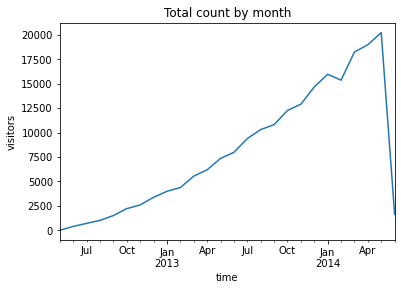

In [28]:
df_eng_m['visited'].plot(title='Total count by month')
plt.ylabel('visitors')
plt.xlabel('time')

plt.show()

In [29]:
# resample hourly
df_eng_h = df_eng.resample('h').sum()

In [30]:
df_eng_h.head()

,user_id,visited
time_stamp,,
2012-05-31 08:00:00,10012,1
2012-05-31 09:00:00,0,0
2012-05-31 10:00:00,0,0
2012-05-31 11:00:00,0,0
2012-05-31 12:00:00,0,0


In [31]:
df_eng_h['hour'] = df_eng_h.reset_index()['time_stamp'].dt.hour.values
df_eng_h['minute'] = df_eng_h.reset_index()['time_stamp'].dt.minute.values

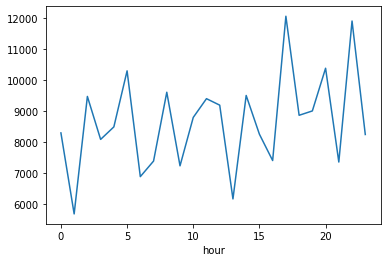

In [32]:
df_eng_h.groupby('hour')['visited'].sum().plot()
plt.show()

In [33]:
dir(df_eng.reset_index()['time_stamp'].dt)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_reset_cache',
 'ceil',
 'date',
 'day',
 'day_name',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'microsecond',
 'minute',
 'month',
 'month_name',
 'nanosecond',
 'normalize',
 'quarter',
 'round',
 'second',
 'st

In [34]:
df_eng['day'] = df_eng.reset_index()['time_stamp'].dt.day_name().values

In [35]:
df_eng.head()

,user_id,visited,day
time_stamp,,,
2014-04-22 03:53:30,1,1,Tuesday
2013-11-15 03:45:04,2,1,Friday
2013-11-29 03:45:04,2,1,Friday
2013-12-09 03:45:04,2,1,Monday
2013-12-25 03:45:04,2,1,Wednesday


In [36]:
# view visits by day of week
df_eng.groupby('day')['visited'].sum()

day
Friday       29730
Monday       29711
Saturday     29728
Sunday       29774
Thursday     29448
Tuesday      29784
Wednesday    29742
Name: visited, dtype: int64

### - Further user engagement

In [37]:
df_usr.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [38]:
df_usr['creation_source'].value_counts(normalize=True)*100

ORG_INVITE            35.450000
GUEST_INVITE          18.025000
PERSONAL_PROJECTS     17.591667
SIGNUP                17.391667
SIGNUP_GOOGLE_AUTH    11.541667
Name: creation_source, dtype: float64

In [39]:
df_usr['opted_in_to_mailing_list'].value_counts(normalize=True)*100

0    75.05
1    24.95
Name: opted_in_to_mailing_list, dtype: float64

In [40]:
df_usr['enabled_for_marketing_drip'].value_counts(normalize=True)*100

0    85.066667
1    14.933333
Name: enabled_for_marketing_drip, dtype: float64

In [41]:
from scipy.stats import pearsonr

In [42]:
print('pearson correlation coefficient for those who opted into mailing list and those who opted into '\
      'marketing drip =', round(pearsonr(df_usr['opted_in_to_mailing_list'],
                                          df_usr['enabled_for_marketing_drip'])[0], 2))

pearson correlation coefficient for those who opted into mailing list and those who opted into marketing drip = 0.48


In [43]:
df_usr[df_usr['opted_in_to_mailing_list'] == 1]['enabled_for_marketing_drip'].value_counts()

0    1652
1    1342
Name: enabled_for_marketing_drip, dtype: int64

In [44]:
df_usr[df_usr['opted_in_to_mailing_list'] == 1]['enabled_for_marketing_drip'].value_counts(normalize=True)*100

0    55.177021
1    44.822979
Name: enabled_for_marketing_drip, dtype: float64

In [45]:
df_usr[df_usr['opted_in_to_mailing_list'] == 0]['enabled_for_marketing_drip'].value_counts()

0    8556
1     450
Name: enabled_for_marketing_drip, dtype: int64

In [46]:
df_usr[df_usr['opted_in_to_mailing_list'] == 0]['enabled_for_marketing_drip'].value_counts(normalize=True)*100

0    95.003331
1     4.996669
Name: enabled_for_marketing_drip, dtype: float64

# Predicting adopted user

In [47]:
from datetime import timedelta

In [48]:
df_au = df_eng.copy()

In [49]:
df_au = df_au.reset_index().drop(['visited', 'day'], axis=1)

In [50]:
df_au['time_stamp'] = df_au['time_stamp'].dt.floor('d').astype(np.int64)

df_au = df_au.sort_values(['user_id', 'time_stamp']).drop_duplicates()

In [51]:
df_au.head()

,time_stamp,user_id
0,1398124800000000000,1
1,1384473600000000000,2
2,1385683200000000000,2
3,1386547200000000000,2
4,1387929600000000000,2


In [52]:
grouped = df_au.groupby('user_id')['time_stamp'].rolling(window=3)

final = pd.to_timedelta((grouped.max()- grouped.min())).dt.days

In [53]:
final.head()

user_id   
1        0     NaN
2        1     NaN
         2     NaN
         3    24.0
         4    26.0
Name: time_stamp, dtype: float64

In [54]:
adopted_users = set(final[final == 7].index.get_level_values('user_id').tolist())

In [55]:
len(adopted_users)

1358

In [56]:
adopted_users = pd.DataFrame(index=adopted_users)

In [57]:
adopted_users['adopted_user'] = 1

In [58]:
df_eng = df_eng.drop(['visited', 'day'], axis=1)

In [59]:
adopted_users.head(10)

,adopted_user
8192,1
2,1
8196,1
10,1
8214,1
8217,1
8220,1
8221,1
33,1
8232,1


In [60]:
df_eng[df_eng['user_id'] == 8192].head(10)

,user_id
time_stamp,
2013-03-22 20:06:52,8192
2013-04-21 20:06:52,8192
2013-04-23 20:06:52,8192
2013-05-07 20:06:52,8192
2013-05-11 20:06:52,8192
2013-05-19 20:06:52,8192
2013-05-20 20:06:52,8192
2013-06-02 20:06:52,8192
2013-06-14 20:06:52,8192


In [61]:
adopted_users = pd.merge(adopted_users, df_eng, how='outer', left_index=True, right_on='user_id').fillna(0)

In [62]:
final_au = adopted_users.reset_index().drop('time_stamp', axis=1).groupby('user_id').mean().reset_index()

In [63]:
final_au.head(15)

,user_id,adopted_user
0,1,0.0
1,2,1.0
2,3,0.0
3,4,0.0
4,5,0.0
5,6,0.0
6,7,0.0
7,10,1.0
8,11,0.0
9,13,0.0


In [64]:
final_au.shape

(8823, 2)

In [65]:
df = pd.merge(final_au, df_usr, how='left', left_on='user_id', right_on='object_id')
df.head()

,user_id,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,0.0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,1.0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,0.0,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,0.0,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,0.0,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


# Pre-processing

In [66]:
X=df[['creation_source', 'last_session_creation_time', 'opted_in_to_mailing_list', 
     'enabled_for_marketing_drip', 'org_id']]
y=df['adopted_user']

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             8823 non-null   object 
 1   last_session_creation_time  8823 non-null   float64
 2   opted_in_to_mailing_list    8823 non-null   int64  
 3   enabled_for_marketing_drip  8823 non-null   int64  
 4   org_id                      8823 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 413.6+ KB


In [68]:
#X['org_id'] = X['org_id'].astype('object')

In [69]:
objects = pd.get_dummies(X.select_dtypes('object'))

In [70]:
X = pd.merge(X.drop(['creation_source', 'org_id'], axis=1), objects, left_index=True, right_index=True)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [73]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6617, 8) (2206, 8) (6617,) (2206,)


# Modeling

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [76]:
dir(model)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'warm_start']

In [77]:
model.score(X_test, y_test)

0.8458748866727108

In [78]:
mod_df = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
mod_df.sort_values('Coefficient', ascending = False, inplace=True)
mod_df

,Coefficient
creation_source_GUEST_INVITE,4.279468e-20
creation_source_PERSONAL_PROJECTS,-4.708713e-20
enabled_for_marketing_drip,-1.534136e-19
creation_source_SIGNUP_GOOGLE_AUTH,-1.878652e-19
opted_in_to_mailing_list,-2.097293e-19
creation_source_SIGNUP,-3.393009e-19
creation_source_ORG_INVITE,-4.053773e-19
last_session_creation_time,-1.224680e-09


# Write-up

    This project involves model and EDA exploration to better understand the users and their usage.
    
    The EDA on the most engaging users reveals the users who invited invited the most users (cell 15 and 19). This information can be used to track their usage patterns to attempt to encourage other users to emulate it. Cell 21 contains the highest using organizations which may be beneficial for promotional ideas. By resampling the time stamp data to monthly intervals, we see usuage in the graph in cell 21. Likewise, hourly resampling reveals the usage throughout the day. Looking at the graph in cell 21, you can see peaks at the 17 and 21 clock hour. Tracking usage patterns may encourage the business to ensure they have enough servers spun up during their busy times and save money by spinning up less servers during troghs. Most users use the service via organization invites (see cell 38), however, my logistic regression model reveals guest invites impact the adopted user liklihood the most (see cell 78). Opting for the marketing list had a positive correlation with thase who signed up for the mailing drip (see cell 42).

      Extracting adopted users required developing a rolling groupby function to look at periods where activation was recorded within a 7 day time period. I was able to extract 1358 users who satisfied the requirements. I then merged these users with their engagement dataframe. I built a logistic regression model to predict which users were most likely to become adopted users (cell 75). The factors that were most heavily weighted in the model's decision were guest invite creation source and last session creation time (cell 78).